# **DIP Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

> ### _**Question 3**_

## Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2

## Global Config

In [2]:
base_path = "../Images/{}"

## Util Functions

In [3]:
def read_image(path, cvtcolor="RGB"):
    if cvtcolor == "RGB":
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB)
    elif cvtcolor == "GRAY":
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY)

def write_image(image, path):
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(path, image)

def show_image(image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

In [4]:
def linContrastStretching(im, a, b):
    mn_r = np.amin(im[:,:,0])
    mn_g = np.amin(im[:,:,1])
    mn_b = np.amin(im[:,:,2])
    mx_r = np.amax(im[:,:,0])
    mx_g = np.amax(im[:,:,1])
    mx_b = np.amax(im[:,:,2])

    img = np.zeros(im.shape)
    im = im.astype(np.float64)

    # Red
    img[:,:,0] = (im[:,:,0] - mn_r) * (b - a) * 1.0 / (mx_r - mn_r)
    img[:,:,0] = np.round(img[:,:,0] + a, decimals=0)

    # Green
    img[:,:,1] = (im[:,:,1] - mn_g) * (b - a) * 1.0 / (mx_g - mn_g)
    img[:,:,1] = np.round(img[:,:,1] + a, decimals=0)

    # Blue
    img[:,:,2] = (im[:,:,2] - mn_b) * (b - a) * 1.0 / (mx_b - mn_b)
    img[:,:,2] = np.round(img[:,:,2] + a, decimals=0)

    return img.astype(np.uint8)

## Main Code

#### Part - A

> `Contrast Stretching`

In [5]:
img = read_image('barbie_flat.png')

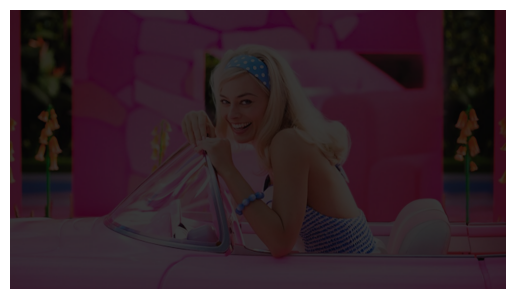

In [16]:
show_image(img)

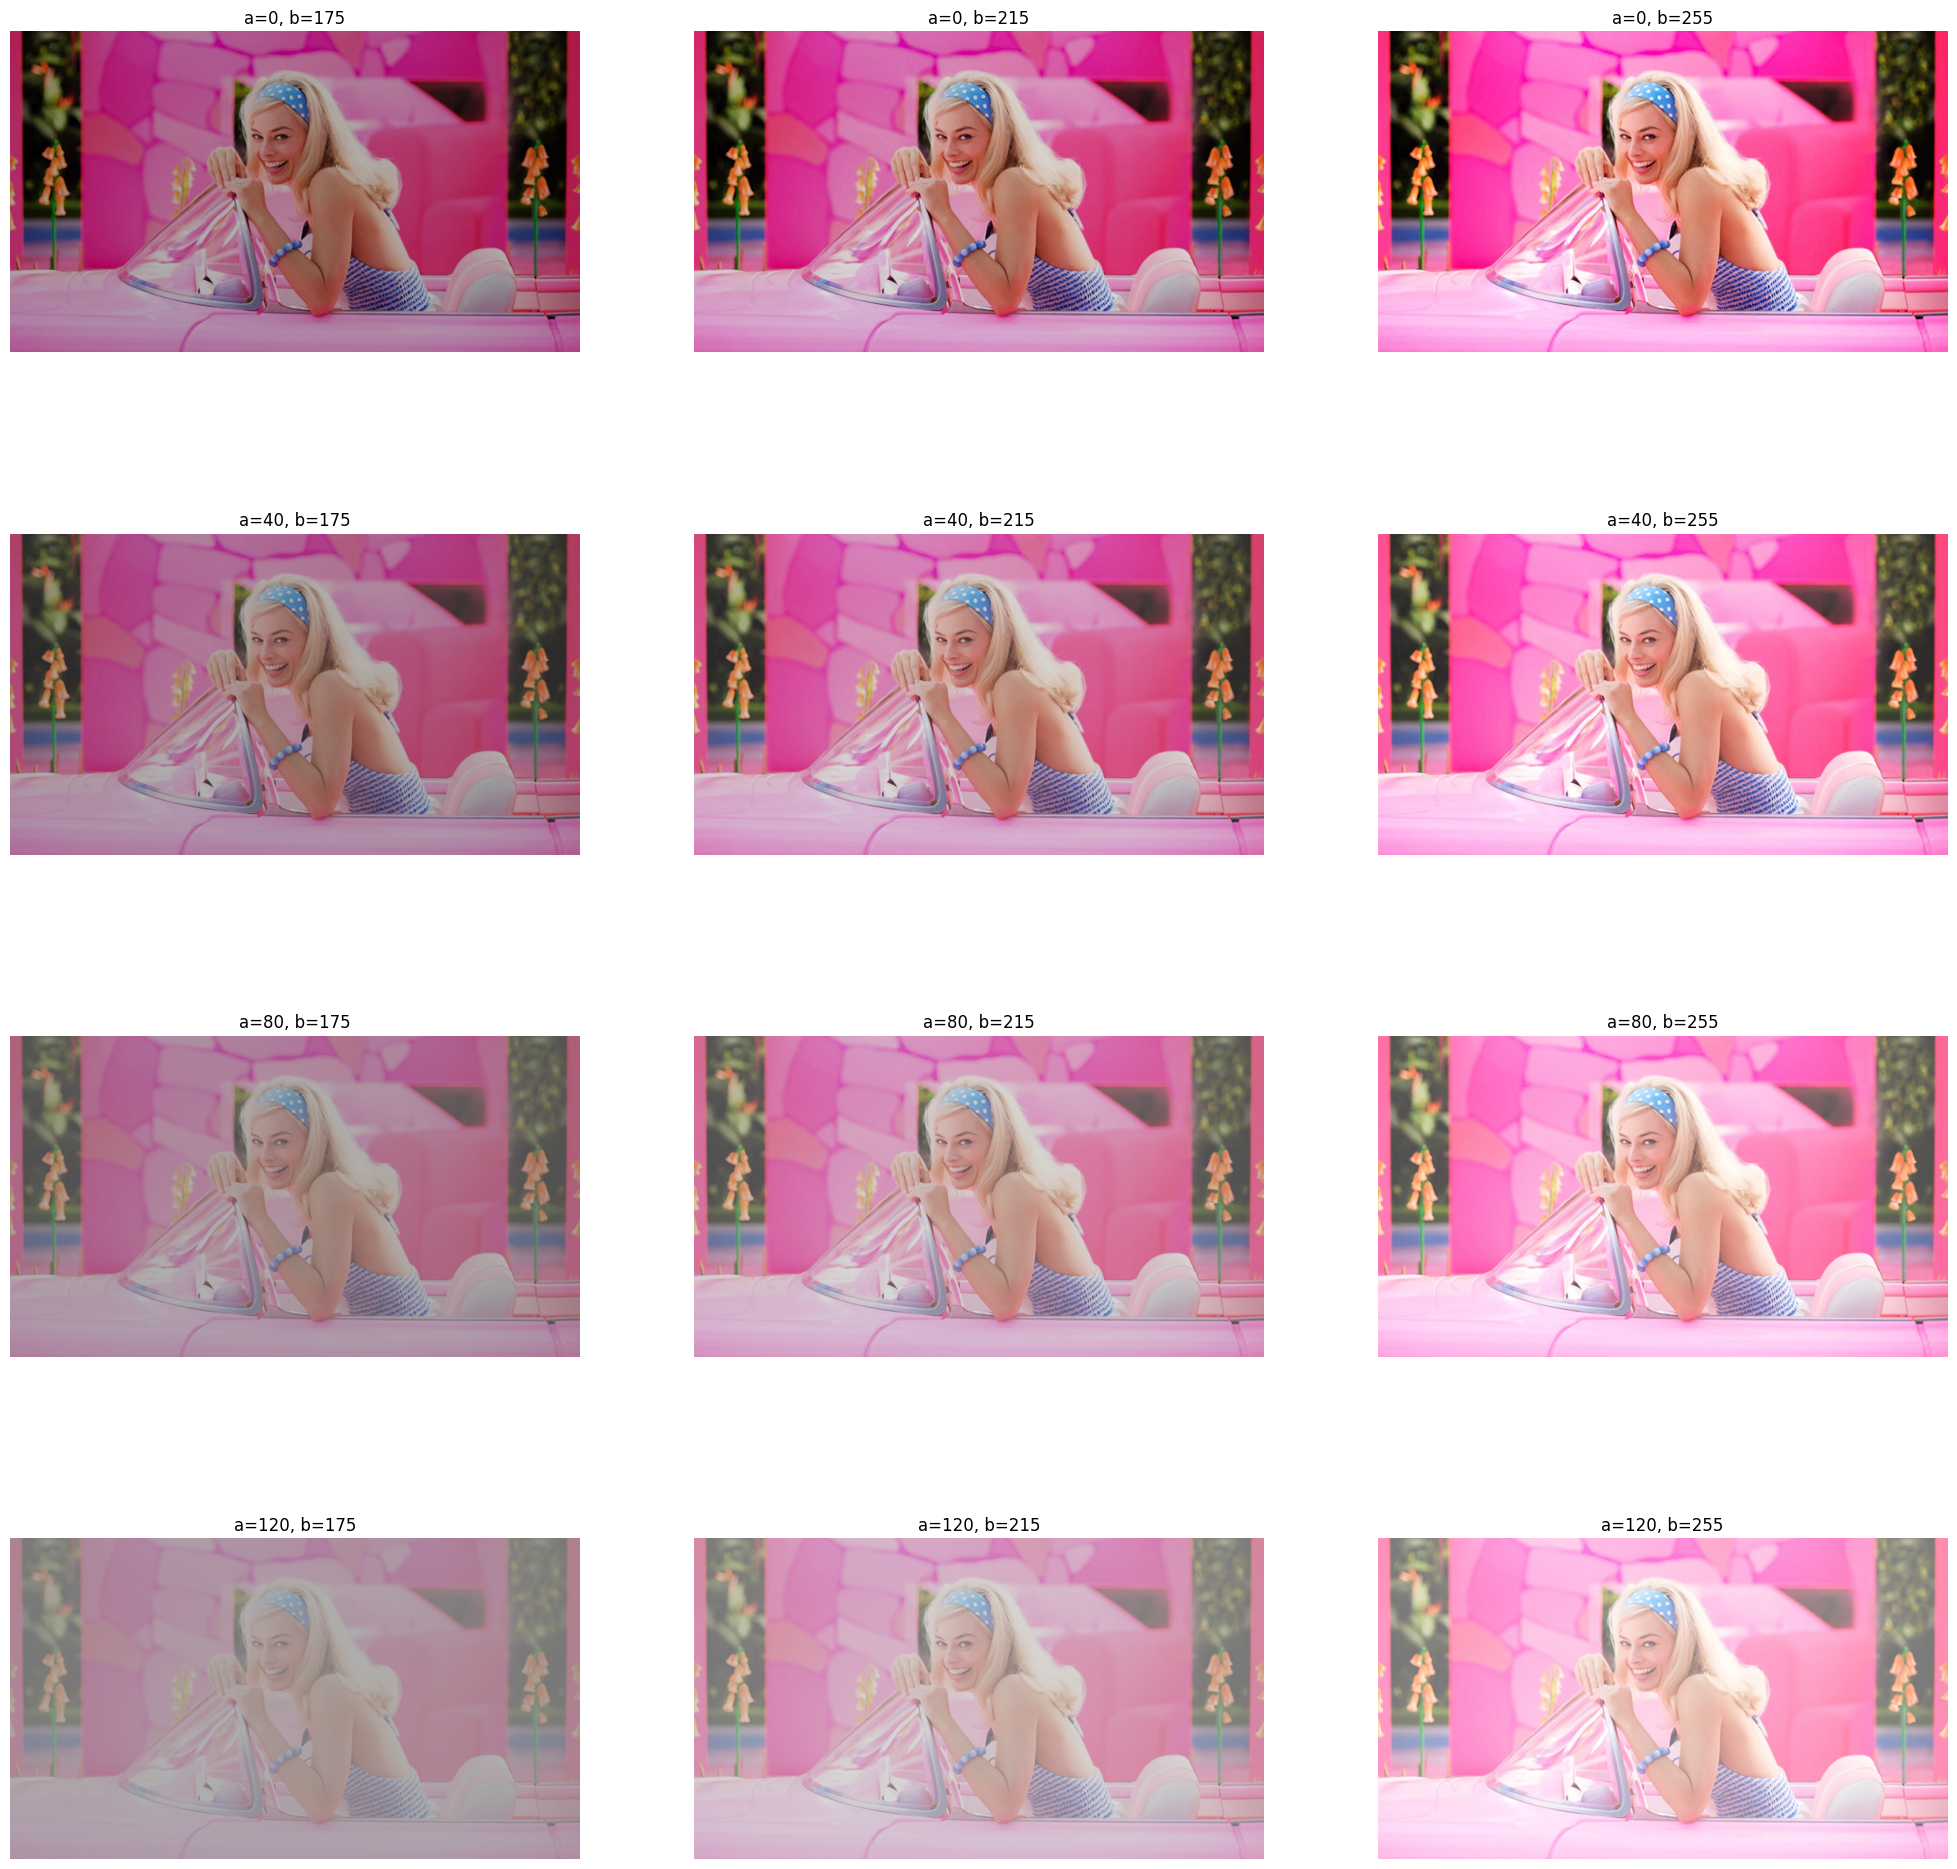

In [20]:
fig, axs = plt.subplots(4,3,figsize=(25,25))

for a in range(0,150,40):
    for b in range(175, 256, 40):
        new_image = linContrastStretching(img, a, b)
        axs[a//40][(b-175)//40].imshow(new_image)
        axs[a//40][(b-175)//40].set_title(f'a={a}, b={b}')
        axs[a//40][(b-175)//40].axis('off')
        
plt.show()

> Best Resulting Image
>
> _a = 0, b = 255_

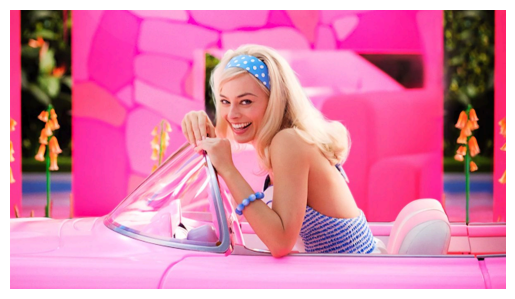

In [19]:
new_image = linContrastStretching(img, 0, 255)
show_image(new_image)

#### Part - B

> `ColorBars`